(481, 827)
(481, 827)


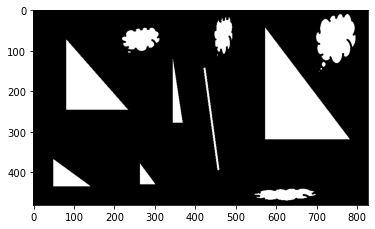

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
source = cv2.imread('test2.png', cv2.IMREAD_COLOR)
image = cv2.cvtColor(source, cv2.COLOR_BGR2GRAY)
th, im_th = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
image = im_th ## to binarize the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
mask = np.zeros((image.shape[0], image.shape[1]), np.uint8)

startI=0
startJ=0
Index2i=-1
Index2j=-1
dir=3
print(image.shape)
print(mask.shape)


In [2]:
def SearchForBoundary(image):
    global mask
    for RowCounter in range(0, len(image)):
        for ColumnCounter in range(0, len(image[0])):
            if (int(image[RowCounter][ColumnCounter])== 255 and int(image[RowCounter][ColumnCounter])== int(mask[RowCounter][ColumnCounter])):
                continue
            if (int(image[RowCounter][ColumnCounter])== 255 and int(image[RowCounter][ColumnCounter-1])== 0):
                global startI
                startI=RowCounter
                global startJ
                startJ=ColumnCounter
                mask[RowCounter][ColumnCounter]=255
                InnerTrace(RowCounter,ColumnCounter)


In [3]:

def InnerTrace(i,j):
    global Index2i
    global Index2j
    global dir
    global mask
    dir=(dir+3)%4
    x,y =Neighbor(i,j)
    Index2i=x
    Index2j=y
    Cont=True
    while(Cont):
        n=x
        m=y
        x,y=Neighbor(n,m)
        if(n==startI and m == startJ and x ==Index2i and y == Index2j):
            Cont=False
            break
    
        
        
    
    



In [4]:
def Neighbor(i,j):
    RS=i
    CS=j
    global dir
    global mask
    dir=(dir+3)%4

    while(RS==i and CS==j):
        print(i,j)
        if(dir==0):
            if(image[i+1][j]==255 ):
                mask[i+1][j]=255
                i=i+1
            else:
                dir=(dir+1)%4
        elif(dir==1):
            if(image[i][j+1]==255):
                mask[i][j+1]=255
                j=j+1
            else:
                dir=(dir+1)%4            
        elif(dir==2):
            if(image[i-1][j]==255):
                mask[i-1][j]=255
                i=i-1
            else:
                dir=(dir+1)%4    
        elif(dir==3):
            if(image[i][j-1]==255):
                mask[i][j-1]=255
                j=j-1
            else:
                dir=(dir+1)%4
    print(i,j)
    return i,j

In [5]:
SearchForBoundary(image)


10 757
10 758
10 758
11 758
11 758
11 757
11 757
10 757
10 757
10 758
10 774
10 774
11 774
11 774
11 773
11 773
11 773
11 773
12 773
12 773
12 772
12 772
12 772
12 772
13 772
13 772
13 771
13 771
13 771
13 771
14 771
14 771
14 770
14 770
14 770
14 770
15 770
15 770
15 770
16 770
16 770
16 769
16 769
16 769
16 769
17 769
17 769
17 769
18 769
18 769
18 768
18 768
18 768
18 767
18 767
18 767
18 767
19 767
19 767
19 766
19 766
19 766
19 765
19 765
18 765
18 765
18 765
18 765
18 764
18 764
17 764
17 764
17 764
17 764
17 763
17 763
16 763
16 763
16 763
15 763
15 763
15 763
14 763
14 763
14 763
14 763
14 762
14 762
13 762
13 762
13 762
12 762
12 762
12 762
12 762
12 761
12 761
11 761
11 761
11 761
11 761
11 760
11 760
11 760
11 759
11 759
10 759
10 759
10 759
10 759
10 758
10 758
10 758
10 757
10 757
10 757
10 757
11 757
11 757
11 756
11 756
11 756
11 756
12 756
12 756
12 755
12 755
12 755
12 755
13 755
13 755
13 754
13 754
13 754
13 754
14 754
14 754
14 753
14 753
14 753
14 753
15 753
15 753

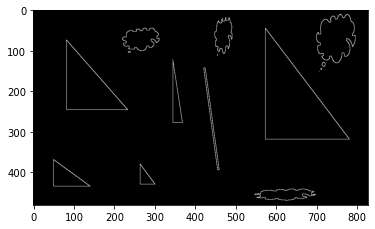

In [6]:
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))


Original Image


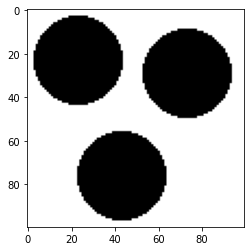

Progress:  0.0 %
Progress:  1.0 %
Progress:  2.0 %
Progress:  3.0 %
Progress:  4.0 %
Progress:  5.0 %
Progress:  6.0 %
Progress:  7.0 %
Progress:  8.0 %
Progress:  9.0 %
Progress:  10.0 %
Progress:  11.0 %
Progress:  12.0 %
Progress:  13.0 %
Progress:  14.0 %
Progress:  15.0 %
Progress:  16.0 %
Progress:  17.0 %
Progress:  18.0 %
Progress:  19.0 %
Progress:  20.0 %
Progress:  21.0 %
Progress:  22.0 %
Progress:  23.0 %
Progress:  24.0 %
Progress:  25.0 %
Progress:  26.0 %
Progress:  27.0 %
Progress:  28.0 %
Progress:  29.0 %
Progress:  30.0 %
Progress:  31.0 %
Progress:  32.0 %
Progress:  33.0 %
Progress:  34.0 %
Progress:  35.0 %
Progress:  36.0 %
Progress:  37.0 %
Progress:  38.0 %
Progress:  39.0 %
Progress:  40.0 %
Progress:  41.0 %
Progress:  42.0 %
Progress:  43.0 %
Progress:  44.0 %
Progress:  45.0 %
Progress:  46.0 %
Progress:  47.0 %
Progress:  48.0 %
Progress:  49.0 %
Progress:  50.0 %
Progress:  51.0 %
Progress:  52.0 %
Progress:  53.0 %
Progress:  54.0 %
Progress:  55.0 %
Pr

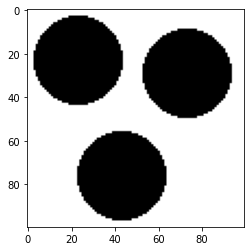

Circles detected


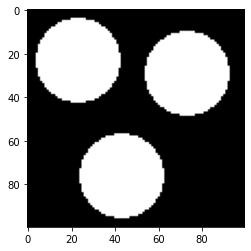

Image after circles detection


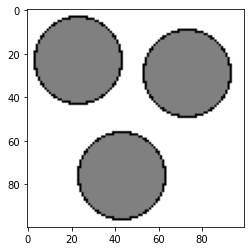

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image                                                                                

#Reads GrayScale image, Percentage Threshold, Minimum R, Maximum R (in pixels)
#returns 3 arrays: X & Y carries the coordinates of the circles centers, R carries the radius of the circles above threshold
def HoughTransform_Circles(Image,Threshold,Rmin,Rmax):
    Image= cv2.GaussianBlur(Image,(5,5),5) #Smooth Image by Gaussian filter
    Image = cv2.Canny(Image,100,200,1) #Edge Detection of Image by Canny edge detector
    
    Num_Rows=Image.shape[0] #Rows Number
    Num_Cols=Image.shape[1] #Columns Number
    Rmax=np.sqrt((Num_Rows**2) + (Num_Cols**2)).astype(int) #Maximum radius
    CirclesAccumulator=np.zeros((Num_Rows,Num_Cols,Rmax-Rmin))#3-D Accumulator with all possible values of X,Y & R
    
    for i in range (0,Num_Rows-1):#Loop on image to detect edges
        print("Progress: ",i*100/Num_Rows,"%") #Progress Percentage
        for j in range (0,Num_Cols-1):
            if(Image[i][j] != 0): #If pixel is an edge 
                for k in range (0,Num_Rows-1,1): #Loop on image to find distance between edge and every possible point
                    for l in range (0,Num_Cols-1,1):
                            radius=round(np.sqrt((i-k)**2 + (j-l)**2)).astype(int) #calculate radius (distance)
                            if (radius <Rmax and radius >Rmin): #if radius is in input range
                                CirclesAccumulator[k][l][radius-Rmin]+=1  #increment the circle of which the point is a part
    
    X,Y,R= np.where(CirclesAccumulator>(Threshold/100)*np.amax(CirclesAccumulator)) # return indices of circles above threshold
    return X,Y,R


OriginalImage = cv2.imread('TESTHOUGH.png',0)   #  the path for the image


print("Original Image")
plt.imshow(OriginalImage,cmap='gray')
plt.show()

Threshold=90
Rmin=15
Rmax=25
X,Y,R= HoughTransform_Circles(OriginalImage,Threshold,Rmin,Rmax) # 3 Lists with parameters of circles above threshold

print("")
print("Row Index (Threshold=90%):",X)
print("Colunmn Index (Threshold=90%):",Y)
print("Radius (Threshold=90%):",R)
print("")

CircleDetection_image=np.zeros((OriginalImage.shape[0],OriginalImage.shape[1])) # #mpty Image


#draw circles detected in empty image
for i in range (0,len(X)):
    for rowcounter in range (0,CircleDetection_image.shape[0]):
        for colcounter in range(0,CircleDetection_image.shape[1]):
                if ((rowcounter-X[i])**2 + (colcounter-Y[i])**2 < (Rmin+R[i])**2 -25):
                    CircleDetection_image[rowcounter][colcounter]=128

                    
print("Original Image")
plt.imshow(OriginalImage,cmap='gray')
plt.show()

print("Circles detected")
plt.imshow(CircleDetection_image,cmap='gray')
plt.show()

print("Image after circles detection")
plt.imshow(OriginalImage+CircleDetection_image,cmap='gray')
plt.show()